<style>
    .zero-margin {
        margin: 0 px;
     }
</style>

<div class="zero-margin" style="text-align: center;">
    <p style="text-align: center; font-size: 20px; margin-bottom: 10px;">Practice Case 03<p>
    <p style="text-align: center; font-size: 40px; margin: 0px; font-weight: bold;text-transform: uppercase;">Sentiment Analysis</p><br/>
    <p  style="text-align: center; margin-bottom: 0px;">Tuesday, October 31st 2019</p>
     <p  style="text-align: center; margin-top: 0px;">M. Haries Ramdhani</p>
</div>

For this practice case I tried to perform sentiment analysis for the top 10 places in Indonesia based on this [article](https://www.touropia.com/best-places-to-visit-in-indonesia/). The data is collected from the subreddit [r/travel](reddit.com/r/travel) on Oct 31st 2019. The data collection was done using the Reddit pushshift API, it takes maximum of 500 comments for each of the places that are listed in the article 

In [1]:
import pandas as pd 
import numpy as np

#import nltk module 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

#import reguler expression 
import re
import time

#import textblob 
from textblob import TextBlob

#visualization 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

import requests
import json

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m.haris01\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# List all of the top 10 places
cities = ["raja%ampat", "tanjung%puting", "flores", "toraja", "bukit%lawang", "bromo", "lombok", "komodo", "yogyakarta", "bali"]

comments = {}

SIZE = 500

# Get the data from the reddit pushshift
for city in cities:
    print(f"GET {city} COMMENTS STARTED")
    
    comments[city] = []
    
    doc = f"https://api.pushshift.io/reddit/search/comment/?q={city}&size={SIZE}&subreddit=travel"
    
    response = requests.get(doc, timeout = 10)
    
    data = json.loads(response.content)
    data = data["data"]
    
    for i in range(len(data)):
        comments[city].append(data[i]['body'])
        
    print(f"GOT {len(comments[city])} {city} COMMENTS")
    print("")
    
    time.sleep(5)

GET raja%ampat COMMENTS STARTED
GOT 161 raja%ampat COMMENTS

GET tanjung%puting COMMENTS STARTED
GOT 10 tanjung%puting COMMENTS

GET flores COMMENTS STARTED
GOT 500 flores COMMENTS

GET toraja COMMENTS STARTED
GOT 68 toraja COMMENTS

GET bukit%lawang COMMENTS STARTED
GOT 118 bukit%lawang COMMENTS

GET bromo COMMENTS STARTED
GOT 360 bromo COMMENTS

GET lombok COMMENTS STARTED
GOT 500 lombok COMMENTS

GET komodo COMMENTS STARTED
GOT 500 komodo COMMENTS

GET yogyakarta COMMENTS STARTED
GOT 368 yogyakarta COMMENTS

GET bali COMMENTS STARTED
GOT 500 bali COMMENTS



# Section B : Data Preprocessing

## Step B.1. Basic Text Pre-processing 

### 1. Lower casing

In [3]:
for city in cities:
    comments[city] = [comment.lower() for comment in comments[city]]
    
pd.DataFrame({"comment" : comments[city]}).head()

,comment
0,bali is one of the most unforgettable places i...
1,bali? what an awesome idea! i've been to bali...
2,&gt; she doesn't like to be around a lot of pe...
3,mid april temperatures would be pretty high in...
4,"no, you can't. airbnb has an age limit of 18, ..."


### 2. Punctuation removal

In [4]:
for city in cities:
    comments[city] = [re.sub(r'[^\w\s]', '', comment) for comment in comments[city]]
    
pd.DataFrame({"comment" : comments[city]}).head()

,comment
0,bali is one of the most unforgettable places i...
1,bali what an awesome idea ive been to bali an...
2,gt she doesnt like to be around a lot of peopl...
3,mid april temperatures would be pretty high in...
4,no you cant airbnb has an age limit of 18 and ...


### 3. Stopwords removal

In [5]:
stop = stopwords.words('english')

for city in cities:
    comments[city] = [" ".join(list(set(comment.split()) - set(stop))) for comment in comments[city]]
    
pd.DataFrame({"comment" : comments[city]}).head()

,comment
0,receptionists always southeast restaurant isla...
1,balihttpswwwyoutubecomwatchv3ixgk3q3qvg singsi...
2,nido mother think people although typical well...
3,culture weather use hope mid helps vegetarian ...
4,practice alternatively cant staying extremely ...


### 4. Frequent words removal

In [6]:
freqs = {}
for city in cities:
    freq = pd.Series(" ".join(comments[city]).split()).value_counts()[:10]
    freq = list(freq.index)
    
    freqs[city] = freq
freqs['bali']

['bali',
 'go',
 'also',
 'like',
 'time',
 'get',
 'really',
 'trip',
 'one',
 'indonesia']

In [7]:
for city in cities:
    comments[city] = [" ".join(x for x in comment.split() if x not in freqs[city]) for comment in comments[city]]
    
pd.DataFrame({"comment" : comments[city]}).head()

,comment
0,receptionists always southeast restaurant isla...
1,balihttpswwwyoutubecomwatchv3ixgk3q3qvg singsi...
2,nido mother think people although typical well...
3,culture weather use hope mid helps vegetarian ...
4,practice alternatively cant staying extremely ...


### 5. Rare words removal

In [8]:
rares = {}
for city in cities:
    rare = pd.Series(" ".join(comments[city]).split()).value_counts()[-10:]
    rare = list(rare.index)
    
    rares[city] = rare
rares['bali']

['jampacked',
 'nacpan',
 'opposite',
 'worstmost',
 'vulcano',
 'labuanbajo',
 'collection',
 'loudness',
 'busvan',
 'zip']

In [9]:
for city in cities:
    comments[city] = [" ".join(x for x in comment.split() if x not in rares[city]) for comment in comments[city]]
    
pd.DataFrame({"comment" : comments[city]}).head()

,comment
0,receptionists always southeast restaurant isla...
1,balihttpswwwyoutubecomwatchv3ixgk3q3qvg singsi...
2,nido mother think people although typical well...
3,culture weather use hope mid helps vegetarian ...
4,practice alternatively cant staying extremely ...


### 6. Spelling correction

In [11]:
for city in cities:
    print(f"{city} COMMENTS CORRECTION STARTED")
    comments[city] = [str(TextBlob(comment).correct()) for comment in comments[city]]
    
    print(f"{city} COMMENTS {len(comments[city])} CORRECTED")

### 7. Tokenization

In [12]:
TextBlob(comments['bali'][1]).words

WordList(['balihttpswwwyoutubecomwatchv3ixgk3q3qvg', 'singsing', 'aspects', 'seawater', 'sunbathed', 'island', 'uluwatu', 'accommodation', 'make', 'see', 'rippling', 'met', 'visit', 'listening', 'belief', 'excellent', 'romantic', 'lovely', 'water', 'comparison', 'surfed', 'much', 'whole', 'unique', 'spend', 'transportation', 'video', 'leveling', 'deep', 'always', 'people', 'ulun', 'english', 'moment', 'experienced', 'leaping', 'lake', 'reef', 'ability', 'dusk', 'feeling', 'christianity', 'remember', 'want', 'never', 'helpful', 'spot', 'local', 'climbed', 'promising', 'ive', 'adored', 'varying', 'skillful', 'lovina', 'coast', 'researched', 'stayed', 'balinese', 'adheres', 'sightseeing', 'temple', 'dolphins', 'magnificent', 'wait', 'enjoy', 'countries', 'vacation', 'sand', 'pura', 'bratan', 'curious', 'islam', 'think', 'friend', 'place', 'awesome', 'love', 'eastern', 'sacred', 'bedugul', '3', 'beach', 'things', 'costs', 'cant', 'similarly', 'following', 'idea', 'peak', 'mount', 'western'

### 8. Stemming

In [13]:
st = PorterStemmer()
for city in cities:
    print(f"{city} COMMENTS STEMMING STARTED")
    
    comments[city] = [" ".join([st.stem(word) for word in comment.split()]) for comment in comments[city]]
    print(f"{city} COMMENTS {len(comments[city])} STEMMED")

raja%ampat COMMENTS STEMMING STARTED
raja%ampat COMMENTS 161 STEMMED
tanjung%puting COMMENTS STEMMING STARTED
tanjung%puting COMMENTS 10 STEMMED
flores COMMENTS STEMMING STARTED
flores COMMENTS 500 STEMMED
toraja COMMENTS STEMMING STARTED
toraja COMMENTS 68 STEMMED
bukit%lawang COMMENTS STEMMING STARTED
bukit%lawang COMMENTS 118 STEMMED
bromo COMMENTS STEMMING STARTED
bromo COMMENTS 360 STEMMED
lombok COMMENTS STEMMING STARTED
lombok COMMENTS 500 STEMMED
komodo COMMENTS STEMMING STARTED
komodo COMMENTS 500 STEMMED
yogyakarta COMMENTS STEMMING STARTED
yogyakarta COMMENTS 368 STEMMED
bali COMMENTS STEMMING STARTED
bali COMMENTS 500 STEMMED


In [14]:
pd.DataFrame({"comment" : comments[city]}).head()

,comment
0,receptionist alway southeast restaur island he...
1,balihttpswwwyoutubecomwatchv3ixgk3q3qvg sings ...
2,nido mother think peopl although typic well lo...
3,cultur weather use hope mid help vegetarian is...
4,practic altern cant stay extrem airbnb problem...


## Aggregating the Sentiments

In [15]:
sentiments = {}
sentiment_classes = {}

for city in cities:
    sentiments[city] = []
    sentiment_classes[city] = []
    
    for comment in comments[city]:
        textB = TextBlob(comment)

        sentiment = textB.sentiment.polarity
        sentiments[city].append(sentiment)

        if sentiment < 0.00:
            sentiment_classes[city].append('Negative')
        elif sentiment > 0.00:
            sentiment_classes[city].append('Positive')
        else:
            sentiment_classes[city].append('Neutral')

In [16]:
df = {}

In [17]:
for city in cities:
    df[city] = pd.DataFrame({"comment": comments[city], "sentiment": sentiments[city], "sentiment_class": sentiment_classes[city]})

In [18]:
df[city].groupby(['sentiment_class'])['sentiment_class'].count()

sentiment_class
Negative     63
Neutral      95
Positive    342
Name: sentiment_class, dtype: int64

In [19]:
sentiment_types = {}
sentiment_counts = {}
charts = {}

for city in cities:
    sentiment = df[city].groupby(['sentiment_class'])['sentiment_class'].count()

    sentiment_types[city] = sentiment.index
    sentiment_counts[city] = sentiment.values
    
    charts[city] = pd.DataFrame({"sentiment": sentiment_types[city], "count": sentiment_counts[city]})[["sentiment", "count"]]
    charts[city]["percentage"] = charts[city]["count"] / charts[city]["count"].sum()

In [20]:
charts['bali']

,sentiment,count,percentage
0,Negative,63,0.126
1,Neutral,95,0.190
2,Positive,342,0.684


In [21]:
charts['raja%ampat']

,sentiment,count,percentage
0,Negative,12,0.074534
1,Neutral,24,0.149068
2,Positive,125,0.776398


In [27]:
palette ={"Negative":"#F0454B","Neutral":"#D1D2F9","Positive":"#7796CB"}

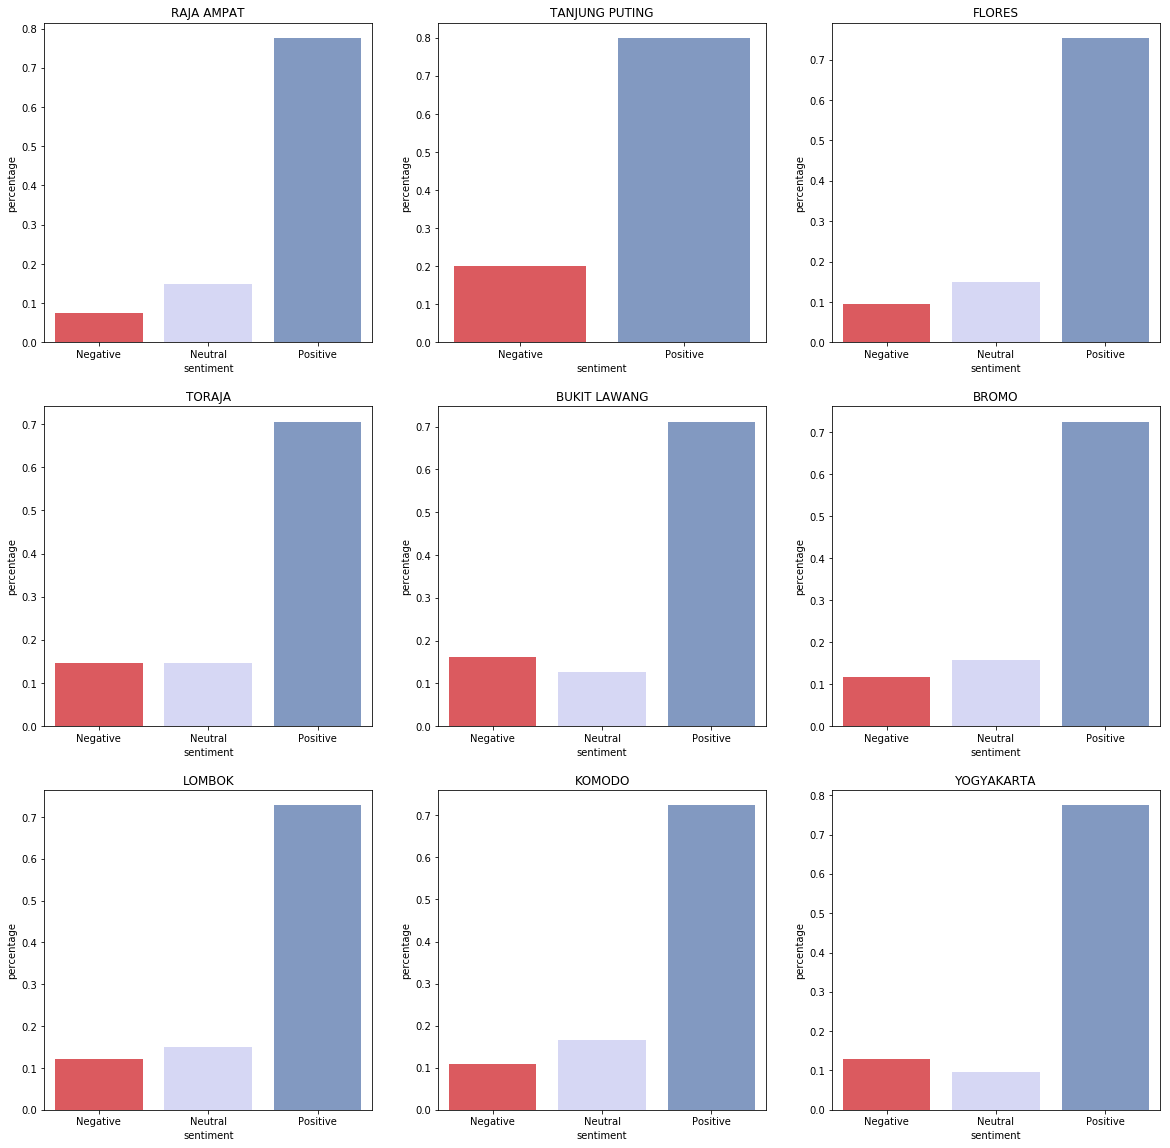

In [28]:
fig, axes = plt.subplots(round(len(cities) / 3), 3, figsize=(20, 20))

for i, ax in enumerate(fig.axes):
    if i < len(cities):
        sns.barplot(x='sentiment', y='percentage', data=charts[cities[i]], ax=ax, palette=palette)
        ax.set_title(cities[i].replace("%", " ").upper()) 

Looking at the charts above, we understood that almost all of the sentiments about the places are positive (majority of them have more than 70% positive comments)